In [39]:
import os
import pandas as pd
%matplotlib inline

In [56]:
#get the gene ids
gene_ids = pd.read_csv('GeneIDs.tsv', delimiter='\t')
gene_ids.set_index('Gene ID', drop=True, inplace=True)

In [2]:
#get the list of the expression data files
all_genes = [f for f in os.listdir() if f.startswith('GeneID') and f.endswith('.txt')]

In [3]:
#merge the data
def read_data(filename):
    return pd.read_csv(filename, skiprows=1, delimiter='\t')

In [59]:
#read all data into a dataframe
data = pd.DataFrame()

for gene in all_genes:
    try:
        data = data.append(read_data(gene))
    except pd.errors.EmptyDataError:
        print('File: "{}" has no data!'.format(gene))
        
#get rid of the last column (NCBI downloaded file has an extra '\t')
data = data.iloc[:,:-1]

File: "GeneID3125.txt" has no data!
File: "GeneID3126.txt" has no data!


In [61]:
#set gene id as index
data.set_index('#GeneID', drop=True, inplace=True)

#append hla gene names
data['HLA'] = gene_ids

In [63]:
#get rid of gene ids
data = data.iloc[:,1:]

#reindex using HLA gene
data.set_index('HLA', drop=True, inplace=True)

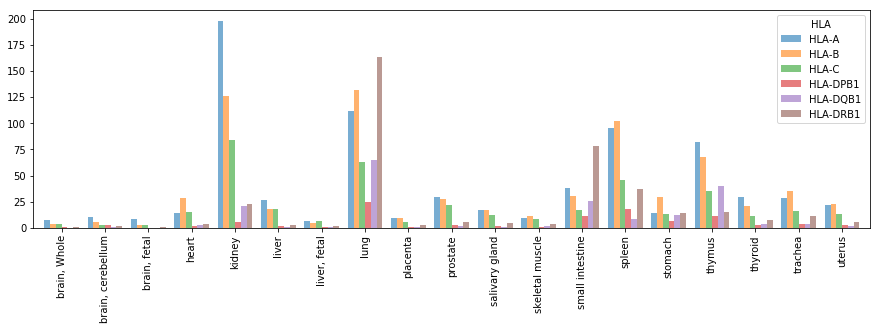

In [78]:
(data.iloc[:-1, :]).T.plot(kind='bar', figsize=(15,4), alpha=.6, width=.8)